<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0615_27%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5Bbatch_size%2Cnumerical_gradient(%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95)%2Cgradient_descent%2CsimpleNet%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

교차 엔트로피 오차

t0[2]

In [ ]:
tk = [0,0,1,0,0,0,0,0,0,0]
yk = [0.1, 0.1, 0.6, 0.1, 0,0,0.1,0,0,0]


\begin{equation*}
E = -\sum_{k} t_{k} log y_{k} = 1*\log 0.6 = 0.51
\end{equation*}

\begin{equation*}
E = -\sum_{k} t_{k} log y_{k} = 1*\log 0.1 = 2.3
\end{equation*}

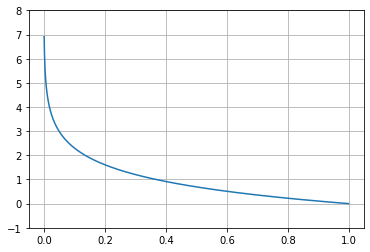

In [ ]:
x = np.arange(0.001, 1.0, 0.001)
y= -np.log(x)
plt.plot(x,y)
plt.ylim(-1.0,8.0)
plt.grid()
plt.show()

In [ ]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t *np.log(y+delta))

In [ ]:
cross_entropy_error(np.array(yk), np.array(tk))

0.510825457099338

In [ ]:
y = [0.6,0.1,0.1,0.1,0,0,0.1,0,0,0]

In [ ]:
cross_entropy_error(np.array(y), np.array(tk))

2.302584092994546

In [ ]:
np.log1p(0.1)

0.09531017980432487

**4.2.3 미니배치 학습**

훈련 데이터 모두에 대한 손실함수의 평균을 구함

교차 엔트로피 오차(훈련데이터 모두에 대한) 수식
\begin{equation*}
E = -\frac1N \sum_{n} \sum_{k} t_{nk} log y_{nk}
\end{equation*}

데이터 N개, tnk:n번째 데이터의 k 차원 째 값을 의미.

ynk는 신경망의 출력. tnk는 정답레이블

N으로 나눔으로써 '평균 손실 함수'ㄹ,ㄹ 그힘

미니배치 :  훈련 데이터로부터 일부만 골라 학습을 수행

미니배치 학습 : 60000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장을 사용하여 학습

MNIST 데이터 셋을 읽어오는 코드

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

y.shape= (10.)#1차원

y.shape[0] = 10 => batch_size = 10

batch_size = 1

y.reshape(1, y.size) => (1,10)#2차원

y.shape[0] = 1 => batch_size = 1

In [ ]:
cross_entropy_error(np.array(y), np.array(tk))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


nan

4.1.2 훈련 데이터와 시험 데이터

기계학습 문제는 훈련 데이터(training data)와 시험 데이터(test data)로 나눠 학습과 실험을 수행하는 것이 일반적

범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리

범용 능력 : 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바를게 풀어내는 능력. 기계학습의 최종 목표

오버피팅(overfitting): 한 데이터셋(예시 : 훈련 데이터만)에만 지나치게 최적화된 상태. 다른 데이터셋을 엉망으로 평가할 수 있음

In [ ]:
p = np.polyfit(X,Y,1)
plt.plot(X, Y, 'ro', X, p[0]+X+p[1], 'ks-')

In [ ]:
#최종 버전 손실함수
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    #훈련 데이터가 원-핫 벡터 라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/ batch_size

# 2

In [ ]:
y

[0.6, 0.1, 0.1, 0.1, 0, 0, 0.1, 0, 0, 0]

In [ ]:
len(y)

10

In [ ]:
len(tk)

10

In [ ]:
tk

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
t_array = np.array(tk)

In [ ]:
t_array

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
t_array.size

10

In [ ]:
t_array.shape

(10,)

In [ ]:
t_ = np.array([[1,2,3],[4,5,6]])

In [ ]:
t_

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
len(t_)

2

In [ ]:
t_.size

6

In [ ]:
t_.shape

(2, 3)

https://velog.io/@rapsby/%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9-%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9

x_train, t_train

x_val , t_val

x_test, t_test

4.3.3 편미분

변수가 다음처럼 2개 이상인 식
$$
f(x_0, x_1) = x_0^2 + x_1^2
$$

파이썬으로 다음과 같이 구현가능

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    #또는 return np.sum(x**2)

4.4 기울기

기울기 (gradient): 모든 변수의 편미분을 벡터로 정리한 것.

$$
(\frac {\partial{f}} {\partial x_0}, \frac {\partial f}{\partial x_1}
$$

기울기 구현 예시

$$
x^2 \quad -> 2 x
\\
x_0^2 \quad -> 2 x_0
\\
x_1^2 \quad -> 2 x_1
$$

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)#x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h)계산
        x[idx]=tmp_val+h #x[0] = -> 0.00000001, 1.000000001
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] =  (fxh1- fxh2)/(2*h)
        x[idx] = tmp_val #값 복원

    return grad

$$
x_0 = x_0 - \eta {\partial f \over \partial {x_0}}
\\
x_1 = x_1 - \eta {\partial f \over \partial {x_1}}
$$

$$
w_i \leftarrow w_i - \eta {\partial L \over \partial {w_i}}
$$

# 3

4.4.1 경사법 (경사 하강법)

최적의 매개변수(가중치와 편향)을 학습 시에 찾음. 최적은 손실함수가 최소값이 될 때 매개변수값.

경사법 : 기울기를 잘 이용해 함수의 최소값을 찾으려는 방법

함수가 극소값, 최소갑스 안장점(saddle point)이 되는 장소에서는 기울기가 0

극소값 : 한정된 범위에서의 최소값인 점

안장점 :  어느방향에서 보면 극대값 다른 방향에서 보면 극소값이되는 점

복잡하고 찌그러진 모양의 함수라면(대부분) 평평한 곳으로 파고들면서 고원(plateau, 플래토)이라 하는, 학습이 진행되지 않는 정체기에 빠질 수 있음.

경사법(gradient method)

현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 다음 위치에서도 또 기울어진 방향으로 나아가는 일을 반복. hyper parameter

경사 하강법(gradient descent method):최소값을 찾음. 신경망 (딥러닝) 분야에서 주로 사용.

경사 상승법(gradient ascent method): 최대값을 찾음 

경사법 수식

$$
x_0 = x_0 - \eta {\partial f \over \partial {x_0}}
\\
x_1 = x_1 - \eta {\partial f \over \partial {x_1}}
$$

학습률(learning rate) : 한번에 얼만큼 학습해야할 지, 매개변수 값을 얼마나 갱신하느냐를 정함

위의 식은 1회에 해당하는 갱신이고, 이 단계를 반복

변수의 값을 여러번 갱신하면서 서서히 함수의 값을 줄임

학습률 값을 변경하면서 올바를게 학습하는지 확인하면서 진행. 너무 크거나 작으면 '좋은 장소'를 찾을 수 없음.

경사 하강법 구현 코드

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)#x와 형상이 같은 배열을 생성

    it = np.nditer(x, flags=['multi_index'],op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx]= tmp_val + h
        fxh1 = f(x)#f(x+h)

        x[idx]= tmp_val -h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2)/ (2*h)

        x[idx] = tmp_val #값 복원
        it.iternext()
    return grad

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-= lr *grad
    return x

In [ ]:
init_x = np.array([-3.0, .40])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num= 100)

array([-6.11110793e-10,  8.14814391e-11])

$$
x_0 = x_0 - \eta {\partial f \over \partial {x_0}}
\\
x_1 = x_1 - \eta {\partial f \over \partial {x_1}}
$$

$$
w_i \leftarrow w_i - \eta {\partial L \over \partial {w_i}}
$$

L = function_2

n = lr= 0.1

식(
$$
w_i - \eta {\partial L \over \partial {w_i}}
$$) => gradient_descent()

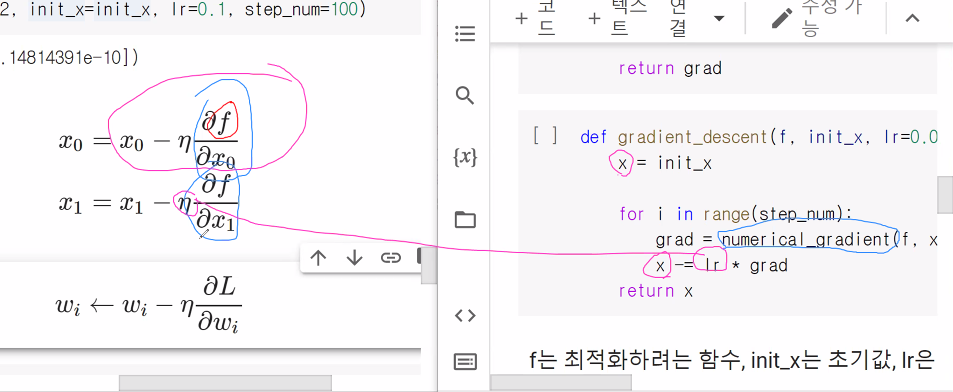

In [ ]:
x = np.arange(10).reshape((2,5))
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:  #반복자가 다 끝났다면
    idx = it.multi_index
    print(idx)
    it.iternext()   #다음 값을 불러줌

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)


In [ ]:
it = np.nditer(x, flags=['f_index'], op_flags=['readwrite'])    #f_index = fort index
while not it.finished:  #반복자가 다 끝났다면
    idx = it.index
    print(idx)
    it.iternext()   #다음 값을 불러줌

0
2
4
6
8
1
3
5
7
9


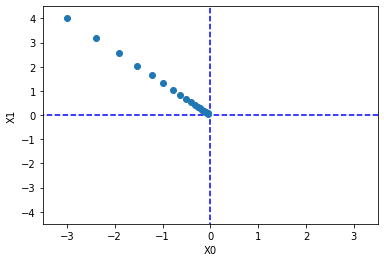

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy() )

        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x, np.array(x_history)
init_x = np.array([-3.0, 4.0])



lr = 0.1
step_num =20
x, x_history = gradient_descent(function_2, init_x, lr= lr, step_num= step_num)

plt.plot([-5, 5],[0,0], '--b')
plt.plot([0,0], [-5,5], '--b')
plt.plot(x_history[:,0],x_history[:,1],'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
x_history

array([[-3.        ,  4.        ],
       [-2.4       ,  3.2       ],
       [-1.92      ,  2.56      ],
       [-1.536     ,  2.048     ],
       [-1.2288    ,  1.6384    ],
       [-0.98304   ,  1.31072   ],
       [-0.786432  ,  1.048576  ],
       [-0.6291456 ,  0.8388608 ],
       [-0.50331648,  0.67108864],
       [-0.40265318,  0.53687091],
       [-0.32212255,  0.42949673],
       [-0.25769804,  0.34359738],
       [-0.20615843,  0.27487791],
       [-0.16492674,  0.21990233],
       [-0.1319414 ,  0.17592186],
       [-0.10555312,  0.14073749],
       [-0.08444249,  0.11258999],
       [-0.06755399,  0.09007199],
       [-0.0540432 ,  0.07205759],
       [-0.04323456,  0.05764608]])

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    #또는 return np.sum(x**2)
    
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)#x와 형상이 같은 배열을 생성

    it = np.nditer(x, flags=['multi_index'],op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx]= tmp_val + h
        fxh1 = f(x)#f(x+h)

        x[idx]= tmp_val -h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2)/ (2*h)

        x[idx] = tmp_val #값 복원
        it.iternext()
    return grad

def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-= lr *grad
    return x

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

1. 학습률이 클 경우, lr = 10

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

2. 학습률이 작은 경우, lr = 0.001

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 0.001, step_num = 100)

array([-2.45570041,  3.27426722])

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 0.01, step_num = 100)

array([-0.39785867,  0.53047822])

학습률이 너무 크면 큰 값으로 발산함

학습률이 너무 작으면 거의 갱신되지 않은 채 끝남

하이퍼파라미터(hyper parameter, 초 매개변수)


4.4.2 신경망에서의 기울기

신경망 기울기 : 가중치 매개변수에 관한 손실 함수의 기울기

형상 2X3, 가중치 W, 손실함수 L인 신경망 수식

\begin{equation*}
W = \begin{vmatrix}
w_{11} w_{12} w_{13}\\
w_{21} w_{22} w_{23}\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\frac{\partial{L}}{\partial{W}} = \begin{vmatrix}
\frac{\partial{L}}{\partial{W_{11}}} \frac{\partial{L}}
{\partial{W_{12}}} \frac{\partial{L}}{\partial{W_{13}}}\\
\frac{\partial{L}}{\partial{W_{14}}} \frac{\partial{L}}
{\partial{W_{15}}} \frac{\partial{L}}{\partial{W_{16}}}\\
\end{vmatrix}
\end{equation*}


아래 행렬의 각 원소는 각각 원소에 대한 편미분

$$
f(x_0, x_1) = x_0^2 + x_1^2
\\
x^2 ->2x
\\
x^2_0 -> 2x_0
\\
x^2_1 -> 2x_1
$$

In [ ]:
#1
def softmax(x):
    if x.ndim ==2:
        #print(x)
        x = x.T     #x값 전치
        x = x-np.max(x, axis=0)
        y = np.exp(x)/np.sum(np.exp(x),axis=0)
        return y.T
    #print(x)
    x = x- np.max(x)    #Overflow 대체
    return np.exp(x)/ np.sum(np.exp(x))    
#2
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    #훈련 데이터가 원-핫 벡터 라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/ batch_size

#3
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)#x와 형상이 같은 배열을 생성

    it = np.nditer(x, flags=['multi_index'],op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx]= tmp_val + h
        fxh1 = f(x)#f(x+h)

        x[idx]= tmp_val -h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2)/ (2*h)

        x[idx] = tmp_val #값 복원
        it.iternext()
    return grad

#4
class simpleNet:
    def __init__(self) -> None:
        self.W = np.random.randn(2,3)   #W객체 생성

    def predict(self,x):
        return np.dot(x, self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

In [ ]:
net = simpleNet()#인스턴스 생성

In [ ]:
net.W

array([[ 0.04990274, -0.07131828,  1.58657938],
       [-0.86203737,  1.2672999 ,  0.27565043]])

In [ ]:
x = np.array([0.6,0.9])
p = net.predict(x)

In [ ]:
p

array([-0.74589199,  1.09777894,  1.20003302])

In [ ]:
t = np.array([0,1,0])

In [ ]:
net.loss(x,t)

0.8179721857299125

In [ ]:
t = np.array([1,0,0])

In [ ]:
np.argmax(p)

2

In [ ]:
net.loss(x,t)

2.6616431207462274

In [ ]:
f = net.loss(x,t)
dw = numerical_gradient(f,net.W)

TypeError: ignored

TypeError: 'numpy.float64' object is not callable


func_name() 구현된 함수 클래스 안에서 __callable__() 요 메서드가 구현이 되면 할 수 있음

In [ ]:
def f(W):

    return net.loss(x,t)
dw = numerical_gradient(f,net.W)

In [ ]:
dw

array([[-0.55809763,  0.2647943 ,  0.29330334],
       [-0.83714645,  0.39719144,  0.43995501]])